# Imports needed through the code

In [1]:
import pandas as pd 
from pca_algorithm_task1 import *
from matplotlib import pyplot as plt
from skimage.transform import resize
import numpy as np
import seaborn as sns
import cv2
import scipy

# Part 1 of Task 1

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:title={'center':'Scatter plot of the data'}, xlabel='x-coordinate', ylabel='y-coordinate'>

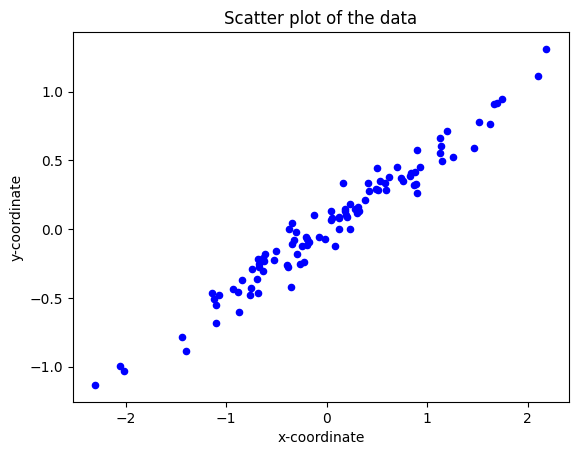

In [2]:
data = read_data()

print(type(data))
data.columns = ['x-coordinate', 'y-coordinate']
data.head()
data.plot(kind='scatter', x='x-coordinate',y='y-coordinate',color = 'blue',title ='Scatter plot of the data',xlabel='x-coordinate',ylabel='y-coordinate')

In [3]:
normalized_data = calculate_mean(data)
print(type(normalized_data))
normalized_data.head()

<class 'pandas.core.frame.DataFrame'>


,x-coordinate,y-coordinate
0,1.563763,0.721889
1,-0.672339,-0.228998
2,-0.588755,-0.269308
3,-1.133551,-0.522697
4,0.804825,0.277642


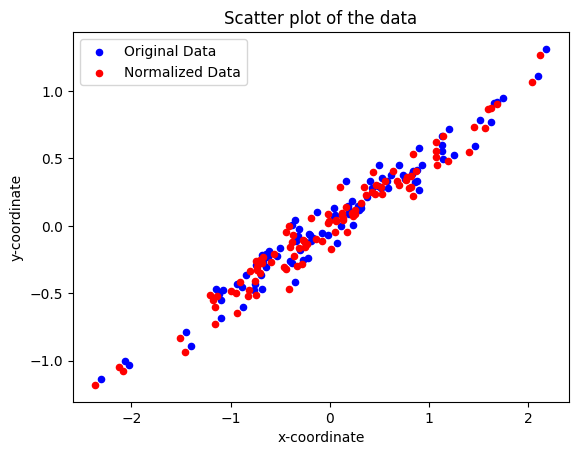

In [4]:
ax = data.plot(kind='scatter', x='x-coordinate',y='y-coordinate',color = 'blue')
normalized_data.plot(ax=ax, kind='scatter', x='x-coordinate',y='y-coordinate', color = 'red',title ='Scatter plot of the data',xlabel='x-coordinate',ylabel='y-coordinate')
ax.legend(["Original Data", "Normalized Data"])

In [5]:
U, singular_values, Vh, S = pca(data)
print(singular_values)
print(Vh)

[9.94340494 0.82624201]
[[-0.88938337  0.45716213]
 [-0.45716213 -0.88938337]]


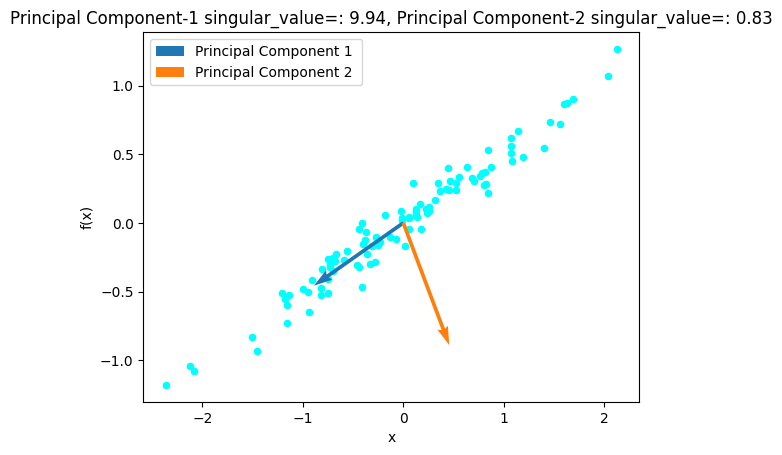

In [6]:
visualize_pc(normalized_data,Vh.T,singular_values)

In [7]:
singular_value_pc1 = singular_values[0]
singular_value_pc2 = singular_values[1]
total_value = singular_value_pc1 + singular_value_pc2
perc_energy_first = singular_value_pc1 * 100 / total_value
perc_energy_second = singular_value_pc2 * 100 / total_value
print("The first principal component contains {}% of the energy in the data".format(round(perc_energy_first, 2)))
print("The second principal component contains {}% of the energy in the data".format(round(perc_energy_second, 2)))



     


The first principal component contains 92.33% of the energy in the data
The second principal component contains 7.67% of the energy in the data


# Part 2 of Task 1

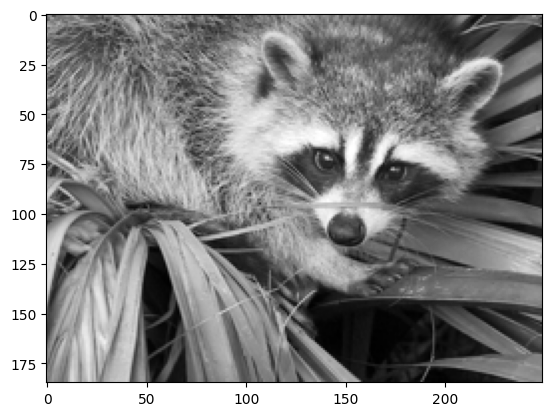

<class 'numpy.ndarray'>


In [8]:
racoon_image = racoon_processing()
racoon_image_np = np.asarray(racoon_image)
print(type(racoon_image_np))

In [9]:
U, singular_values, Vh, S = pca(racoon_image_np.T)

print(len(singular_values))
print(len(S))

185
249


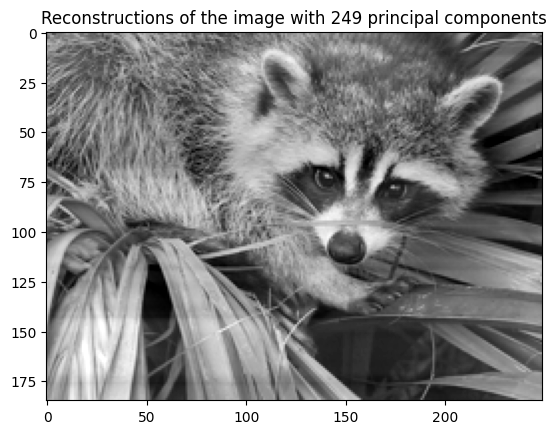

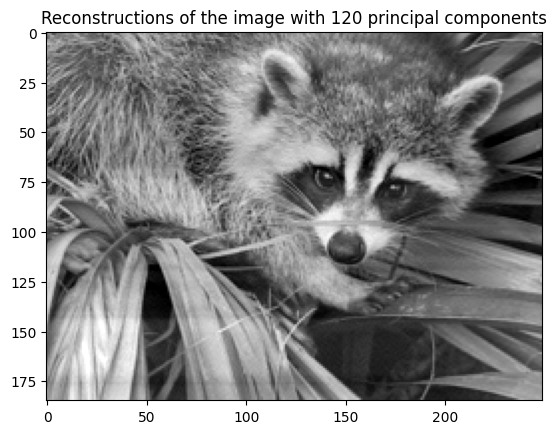

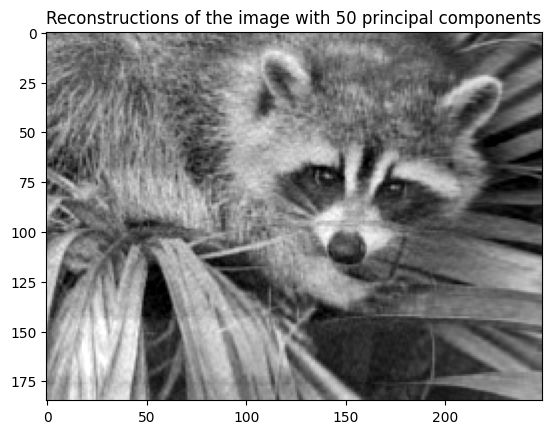

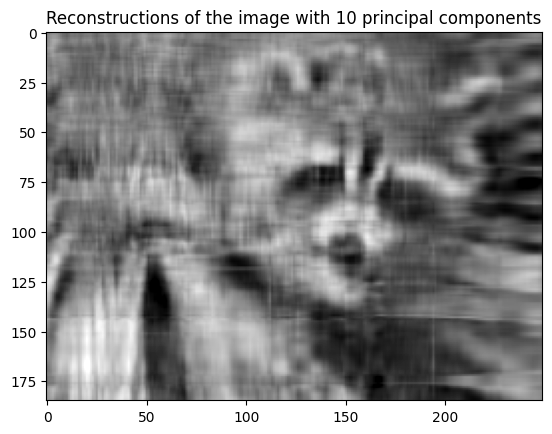

In [10]:
input_racoon = racoon_image_np.T
principal_components_test = [249,120,50,10]

for pc in principal_components_test:
    reconstruction(input_racoon, pc)

less than 1% energy loss at number of principal components: 86


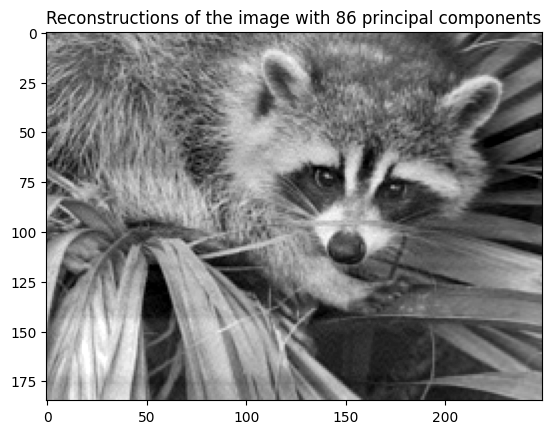

In [11]:
temp = find_pc(input_racoon)
reconstruction(input_racoon, temp)

#  Part 3 of Task 1

In [12]:
pedestrians = read_pedestrians_data()
print(type(pedestrians))
pedestrians.head()

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,7.682746,16.590135,13.483825,16.516303,4.094633,12.947896,6.185209,14.051827,2.384750,11.906402,...,7.618038,14.830008,5.793517,7.085613,13.165387,18.276296,10.980464,17.096179,5.906016,15.322550
1,8.145535,16.648409,13.277208,16.328543,4.044564,12.747607,6.039434,14.420585,2.158819,11.833650,...,7.307820,14.957749,5.541795,7.212933,13.209182,18.195222,11.202859,17.305462,5.822190,15.679348
2,7.887370,16.508989,13.481755,16.028657,3.819413,13.021751,5.865487,14.156773,1.987087,11.675436,...,7.386211,14.685901,5.426626,7.085823,13.417320,18.207198,11.005363,17.370636,5.552942,15.409457
3,7.946284,16.306714,13.712739,16.406934,4.325781,12.930226,5.501616,14.330293,1.944104,11.744856,...,7.323483,14.580033,5.046127,7.388251,13.822416,18.175465,11.041945,16.840682,5.196317,15.293325
4,7.890591,16.154034,13.680053,16.130988,4.193020,13.185905,6.015438,14.806179,1.696377,11.606308,...,6.681000,14.940958,5.360103,7.249443,13.255405,17.885457,11.012918,17.334755,5.829825,15.386860


In [13]:
first_pedestrian = pedestrians.iloc[:,0:2]
second_pedestrian = pedestrians.iloc[:,2:4]

In [14]:
first_pedestrian.columns = ['x-coordinate', 'y-coordinate']
first_pedestrian.head()

,x-coordinate,y-coordinate
0,7.682746,16.590135
1,8.145535,16.648409
2,7.887370,16.508989
3,7.946284,16.306714
4,7.890591,16.154034


In [15]:
second_pedestrian.columns = ['x-coordinate', 'y-coordinate']
second_pedestrian.head()

,x-coordinate,y-coordinate
0,13.483825,16.516303
1,13.277208,16.328543
2,13.481755,16.028657
3,13.712739,16.406934
4,13.680053,16.130988


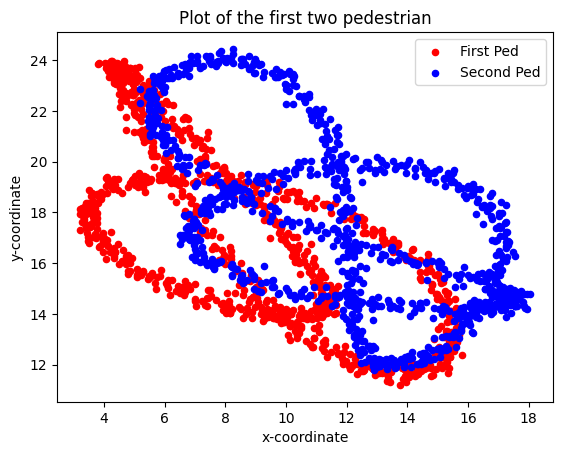

In [16]:
ax = first_pedestrian.plot(kind='scatter', x='x-coordinate',y='y-coordinate',color = 'red')
second_pedestrian.plot(ax=ax, kind='scatter', x='x-coordinate',y='y-coordinate',title = 'Plot of the first two pedestrian', color = 'blue')
ax.legend(["First Ped", "Second Ped"])

In [17]:
U, singular_values, Vh, S = pca(pedestrians)
new_S = shrink_principle_components_matrix(pedestrians, 2)
reconstruction_result = (U @ new_S @ Vh.T)
reconstruction_result_pd = pd.DataFrame(reconstruction_result)

In [18]:
first_pedestrian = reconstruction_result_pd.iloc[:,0:2]
second_pedestrian = reconstruction_result_pd.iloc[:,2:4]

In [19]:
first_pedestrian.columns = ['x-coordinate', 'y-coordinate']
first_pedestrian.head()

,x-coordinate,y-coordinate
0,-1.003443,-0.671058
1,-0.870120,-0.759373
2,-0.827958,-0.818516
3,-0.821246,-0.809250
4,-0.681652,-0.925563


In [20]:
second_pedestrian.columns = ['x-coordinate', 'y-coordinate']
second_pedestrian.head()

,x-coordinate,y-coordinate
0,1.720150,-1.044405
1,1.729843,-1.110591
2,1.774810,-1.167569
3,1.756891,-1.155065
4,1.799048,-1.251900


The energy captured by the first 2 principal components is 84.92%


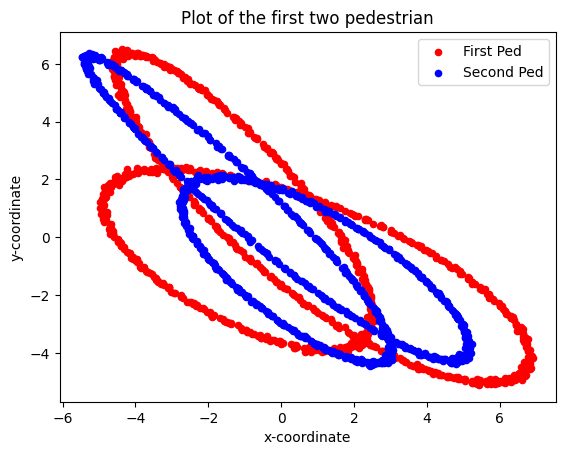

In [21]:
ax = first_pedestrian.plot(kind='scatter', x='x-coordinate',y='y-coordinate',color = 'red')
second_pedestrian.plot(ax=ax, kind='scatter', x='x-coordinate',y='y-coordinate',title = 'Plot of the first two pedestrian', color = 'blue')
ax.legend(["First Ped", "Second Ped"])

energy = compute_energy(pedestrians,2)
print("The energy captured by the first 2 principal components is{}".format(round(energy * 100, 2)))


In [22]:
num_components = 0
for number_components in range(0,len(singular_values)):
    energy = compute_energy(pedestrians,number_components)
    if energy >= 0.9:
            num_components = number_components
            break

In [23]:
U, singular_values, Vh, S = pca(pedestrians)
new_S = shrink_principle_components_matrix(pedestrians, num_components)
reconstruction_result = (U @ new_S @ Vh.T)
reconstruction_result_pd = pd.DataFrame(reconstruction_result)

In [24]:
first_pedestrian = reconstruction_result_pd.iloc[:,0:2]
second_pedestrian = reconstruction_result_pd.iloc[:,2:4]

In [25]:
first_pedestrian.columns = ['x-coordinate', 'y-coordinate']
first_pedestrian.head()

,x-coordinate,y-coordinate
0,-0.989929,-0.651726
1,-0.857136,-0.740798
2,-0.821370,-0.809093
3,-0.821896,-0.810178
4,-0.693221,-0.942111


In [26]:
second_pedestrian.columns = ['x-coordinate', 'y-coordinate']
second_pedestrian.head()

,x-coordinate,y-coordinate
0,1.625473,-1.084676
1,1.638878,-1.149283
2,1.728663,-1.187197
3,1.761439,-1.153131
4,1.880092,-1.217428


The energy captured by the first 3 principal components is 99.71


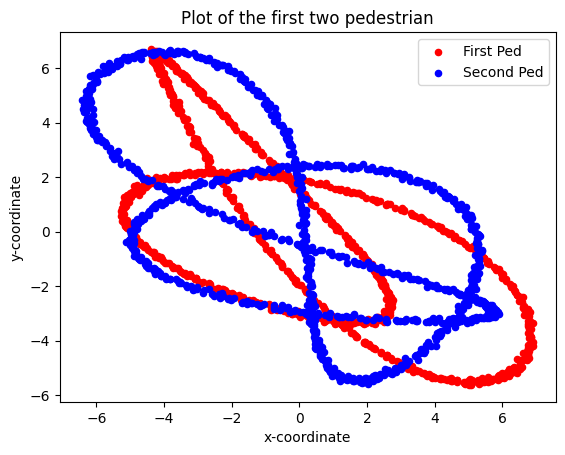

In [27]:
ax = first_pedestrian.plot(kind='scatter', x='x-coordinate',y='y-coordinate',color = 'red')
second_pedestrian.plot(ax=ax, kind='scatter', x='x-coordinate',y='y-coordinate',title = 'Plot of the first two pedestrian', color = 'blue')
ax.legend(["First Ped", "Second Ped"])

energy = compute_energy(pedestrians,num_components)
print("The energy captured by the first {} principal components is {} %".format(num_components,round(energy * 100, 2)))